In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

df = pd.read_csv(r'C:\Users\ajeva\Downloads\movies.csv')

In [2]:
# Checking missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [3]:
# Checking data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [4]:
#Change data types of columns 

df['budget'] = df['budget'].fillna(0).astype('int64')
df['gross'] = df['gross'].fillna(0).astype('int64')

In [6]:
# Correcting released and year columns

def extract_year(val):
    try:
        # Convert anything to string
        val_str = str(val)
        # Search for a 4-digit year
        match = re.search(r'\b(\d{4})\b', val_str)
        if match:
            return int(match.group(1))
        else:
            return np.nan
    except:
        return np.nan

df['yearCorrected'] = df['released'].apply(extract_year)
df['yearCorrected'] = df['yearCorrected'].astype('Int64')

df.head(5)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrected
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [7]:
#Ordering by gross revenue

df = df.sort_values(by=['gross'], inplace=False, ascending=False)

In [8]:
pd.set_option('display.max_rows', None)


In [11]:
#drop any duplicates

df.drop_duplicates().head(5)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrected
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


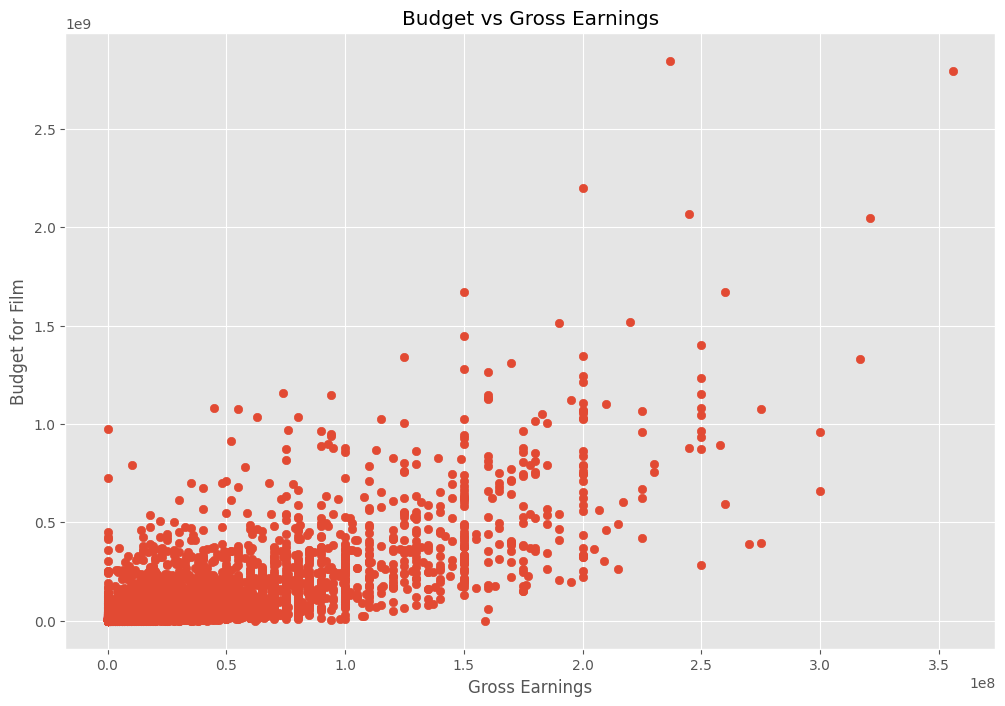

In [12]:
# Budget high correlation
# Company high correlation

# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y=df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget for Film')
plt.show()

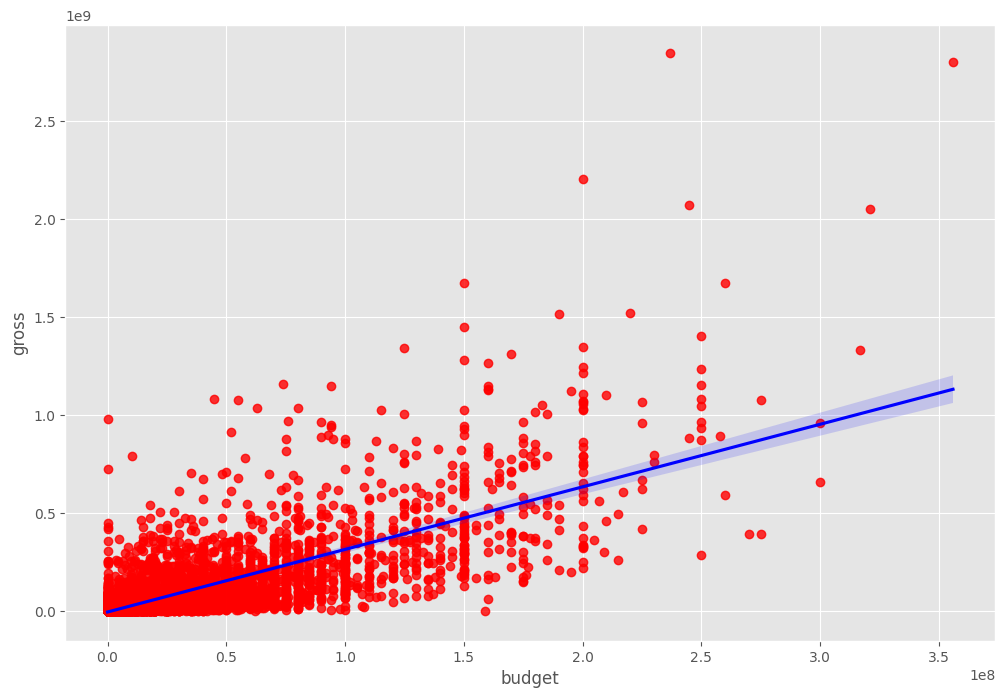

In [30]:
# Plot budget vs gross revenue using seaborn
 
sns.regplot(x='budget', y='gross', data=df, scatter_kws={"color": "red"}, line_kws={"color": "blue"})
plt.show()

In [13]:
# Checking Correlation

df.corr(method='pearson', numeric_only=True)

,year,score,votes,budget,gross,runtime,yearCorrected
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811,0.997415
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451,0.105994
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212,0.218429
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510,0.300066
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235,0.255026
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000,0.120636
yearCorrected,0.997415,0.105994,0.218429,0.300066,0.255026,0.120636,1.000000


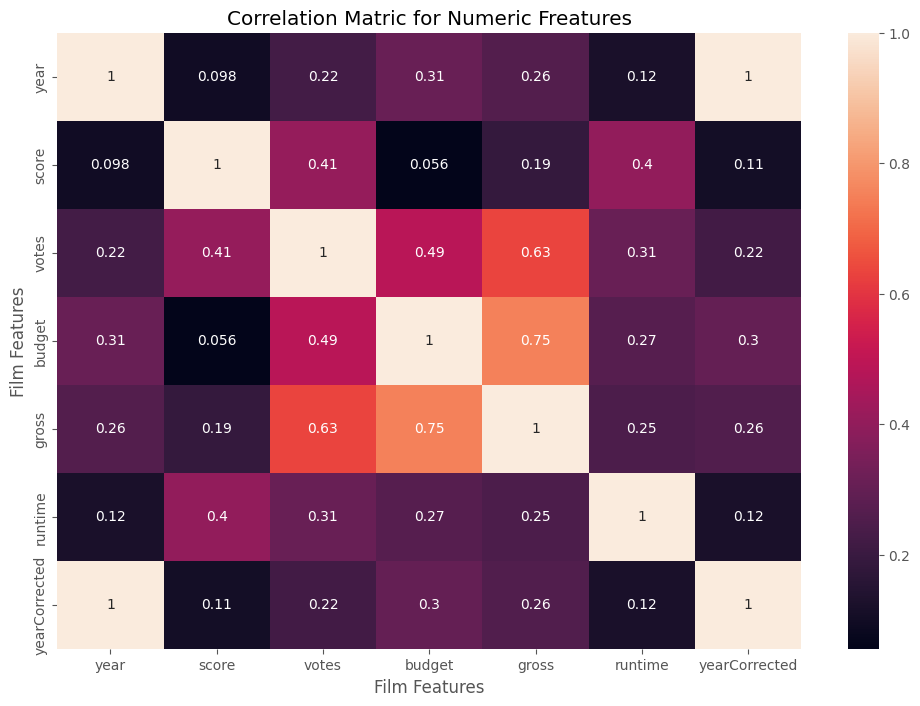

In [14]:
# High Correlation between budget and gross

correlation_matrix = df.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Freatures')

plt.xlabel('Film Features')

plt.ylabel('Film Features')


plt.show()
plt.clf()


In [15]:
# Numerize Company names

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearCorrected
5445,533,5,0,2009,696,7.8,1100000.0,1155,1778,2334,55,237000000,2847246203,2253,162.0,2009
7445,535,5,0,2019,183,8.4,903000.0,162,743,2241,55,356000000,2797501328,1606,181.0,2019
3045,6896,5,6,1997,704,7.8,1100000.0,1155,1778,1595,55,200000000,2201647264,2253,194.0,1997
6663,5144,5,0,2015,698,7.8,876000.0,1125,2550,524,55,245000000,2069521700,1540,138.0,2015
7244,536,5,0,2018,192,8.4,897000.0,162,743,2241,55,321000000,2048359754,1606,149.0,2018


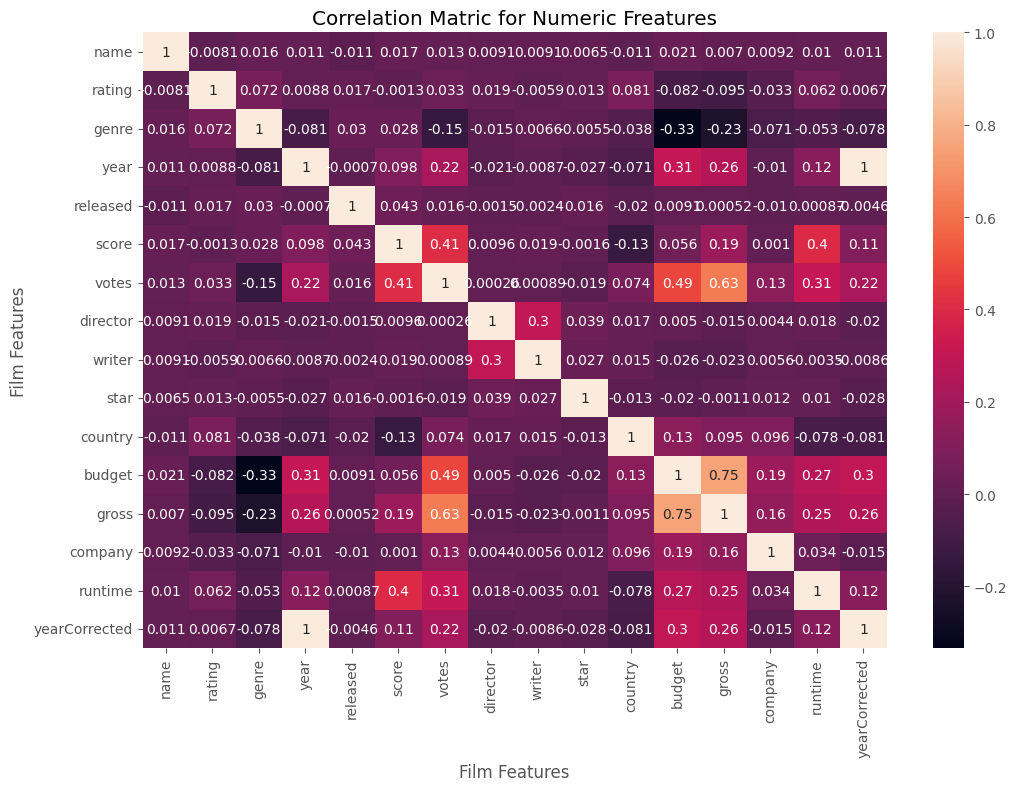

In [16]:
correlation_matrix = df_numerized.corr(method='pearson', numeric_only=True)

sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matric for Numeric Freatures')

plt.xlabel('Film Features')

plt.ylabel('Film Features')


plt.show()
plt.clf()

In [17]:
# Seeing highest correlation

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.head()

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
dtype: float64

In [18]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs.head()

genre   budget   -0.334021
budget  genre    -0.334021
gross   genre    -0.234297
genre   gross    -0.234297
        votes    -0.145307
dtype: float64

In [19]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

gross          votes            0.632834
votes          gross            0.632834
gross          budget           0.750157
budget         gross            0.750157
year           yearCorrected    0.997415
yearCorrected  year             0.997415
director       director         1.000000
votes          votes            1.000000
released       released         1.000000
score          score            1.000000
rating         rating           1.000000
name           name             1.000000
genre          genre            1.000000
year           year             1.000000
budget         budget           1.000000
country        country          1.000000
writer         writer           1.000000
star           star             1.000000
company        company          1.000000
gross          gross            1.000000
runtime        runtime          1.000000
yearCorrected  yearCorrected    1.000000
dtype: float64

In [20]:
# votes and budget have the highest correlation to gross earnings
# company has low correlation